In [60]:
from numpy import *

def read_data_from_file(filename,delim='\t'):
    f = open(filename)
    data_set = []
    for line in f.readlines():
        string = line.strip().split(delim)
        temp_list = [float(item) for item in string ]
        data_set.append(temp_list)
    return mat(data_set)

data_set_mat = read_data_from_file("testSet.txt")



In [61]:
def pca(data_set_mat, feature_num):
    mean_value = mean(data_set_mat, axis=0)
    diff_mean_mat = data_set_mat - mean_value
    cov_mat = mat(cov(diff_mean_mat, rowvar=0))
    eig_vals, eig_feat = linalg.eig(cov_mat)
    
    eig_vals_sort = argsort(eig_vals)
    eig_vals_sort = eig_vals_sort[-(feature_num +1): -1]
    eig_feat = eig_feat[:, eig_vals_sort]
    pca_mat = diff_mean_mat * eig_feat
    
    recon_mat = (pca_mat * eig_feat.T) + mean_value
    return pca_mat, recon_mat

test_set_pca, test_recon = pca(data_set_mat,1)
print test_recon.shape

(1000L, 2L)


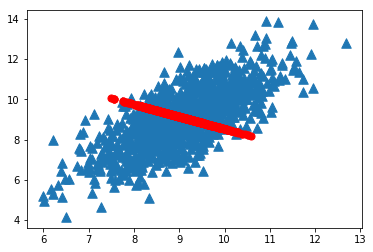

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(data_set_mat[:,0].flatten().A[0], data_set_mat[:,1].flatten().A[0], marker='^', s=90)
axes.scatter(test_recon[:,0].flatten().A[0], test_recon[:,1].flatten().A[0], marker="o", s=50, c="red")
plt.show()

In [64]:
def replace_NaN_with_mean():
    secom_mat = read_data_from_file("secom.data"," ")
    row_num, col_num = shape(secom_mat)
    for col_index in range(col_num):
        mean_value = mean(secom_mat[nonzero(~isnan(secom_mat[:,col_index].A))[0],col_index])
    
        secom_mat[nonzero(isnan(secom_mat[:, col_index].A))[0], col_index] = mean_value
    return secom_mat
secom_mat  = replace_NaN_with_mean()
                                 
print secom_mat
#secn_low_mat , secon_recon_mat = pca(data,1)
                                   

[[  3.03093000e+03   2.56400000e+03   2.18773330e+03 ...,   1.64749042e-02
    5.28333333e-03   9.96700663e+01]
 [  3.09578000e+03   2.46514000e+03   2.23042220e+03 ...,   2.01000000e-02
    6.00000000e-03   2.08204500e+02]
 [  2.93261000e+03   2.55994000e+03   2.18641110e+03 ...,   4.84000000e-02
    1.48000000e-02   8.28602000e+01]
 ..., 
 [  2.97881000e+03   2.37978000e+03   2.20630000e+03 ...,   8.60000000e-03
    2.50000000e-03   4.35231000e+01]
 [  2.89492000e+03   2.53201000e+03   2.17703330e+03 ...,   2.45000000e-02
    7.50000000e-03   9.34941000e+01]
 [  2.94492000e+03   2.45076000e+03   2.19544440e+03 ...,   1.62000000e-02
    4.50000000e-03   1.37784400e+02]]


In [68]:
secom_mean = mean(secom_mat , axis=0)
secom_diff_mean = secom_mat - secom_mean
secom_cov = cov(secom_diff_mean, rowvar=0)
secom_eig_vals, secom_eig_feat = linalg.eig(secom_cov) 

print secom_eig_vals

[  5.34151979e+07   2.17466719e+07   8.24837662e+06   2.07388086e+06
   1.31540439e+06   4.67693557e+05   2.90863555e+05   2.83668601e+05
   2.37155830e+05   2.08513836e+05   1.96098849e+05   1.86856549e+05
   1.52422354e+05   1.13215032e+05   1.08493848e+05   1.02849533e+05
   1.00166164e+05   8.33473762e+04   8.15850591e+04   7.76560524e+04
   6.66060410e+04   6.52620058e+04   5.96776503e+04   5.16269933e+04
   5.03324580e+04   4.54661746e+04   4.41914029e+04   4.15532551e+04
   3.55294040e+04   3.31436743e+04   2.67385181e+04   1.47123429e+04
   1.44089194e+04   1.09321187e+04   1.04841308e+04   9.48876548e+03
   8.34665462e+03   7.22765535e+03   5.34196392e+03   4.95614671e+03
   4.23060022e+03   4.10673182e+03   3.41199406e+03   3.24193522e+03
   2.74523635e+03   2.35027999e+03   2.16835314e+03   1.86414157e+03
   1.76741826e+03   1.70492093e+03   1.66199683e+03   1.53948465e+03
   1.33096008e+03   1.25591691e+03   1.15509389e+03   1.12410108e+03
   1.03213798e+03   1.00972093e+03